In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [117]:
import os
os.getcwd()

'C:\\Users\\Omkar\\Desktop\\Hackathon\\Updated Hackathon'

In [118]:
os.chdir('C:/Users/Omkar/Desktop/Hackathon/Updated Hackathon')

In [119]:
os.getcwd()

'C:\\Users\\Omkar\\Desktop\\Hackathon\\Updated Hackathon'

In [120]:
%%html
<style>
body {
    font-family: "Comic Sans MS", cursive, sans-serif;
}
</style>   

In [121]:
df = pd.read_csv('Train.csv')

In [122]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 15000
Total number of columns in dataset = 44


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 44 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-

In [124]:
df.describe(exclude =['O']).T

,count,mean,std,min,25%,50%,75%,max
ID,15000.0,10032.077067,5.760372e+03,1.00,5060.5000,10054.00,15015.2500,19998.00
age,15000.0,47.790600,3.063277e+01,25.00,33.0000,40.00,53.0000,223.00
region_code,15000.0,598.415467,2.200623e+02,123.00,424.0000,623.00,799.0000,974.00
cc_cons_apr,15000.0,17957.391719,2.518794e+04,253.00,4411.0275,10288.10,21405.0000,441031.33
dc_cons_apr,15000.0,8171.098287,1.477303e+04,19.35,1634.0000,3996.90,9339.0200,229255.00
cc_cons_may,15000.0,16337.054662,2.706085e+04,157.00,3638.0000,8695.03,18951.3000,1117246.31
dc_cons_may,15000.0,7703.605203,1.898730e+04,22.00,1643.5000,3820.50,8212.0000,911223.49
cc_cons_jun,15000.0,12129.010832,1.848878e+04,65.00,3004.5000,6655.25,14247.0000,382914.10
dc_cons_jun,15000.0,7097.395321,1.325170e+04,62.00,1358.7500,3327.00,7597.0000,233384.00
cc_count_apr,15000.0,41.488333,9.743225e+01,1.00,5.0000,10.00,44.0000,531.00


In [125]:
df.set_index('ID',inplace = True)

Missing Data in Dataframe

In [126]:
def missing_data(dataset):
    total = df.isnull().sum().sort_values(ascending= False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis =1, keys =['Total','Percent'])
    return missing_data

null_values = missing_data(df)
print(null_values)

                       Total  Percent
cc_cons                    0      0.0
cc_count_apr               0      0.0
vehicle_loan_active        0      0.0
personal_loan_active       0      0.0
card_lim                   0      0.0
dc_count_jun               0      0.0
dc_count_may               0      0.0
dc_count_apr               0      0.0
cc_count_jun               0      0.0
cc_count_may               0      0.0
dc_cons_jun                0      0.0
vehicle_loan_closed        0      0.0
cc_cons_jun                0      0.0
dc_cons_may                0      0.0
cc_cons_may                0      0.0
dc_cons_apr                0      0.0
cc_cons_apr                0      0.0
region_code                0      0.0
age                        0      0.0
gender                     0      0.0
personal_loan_closed       0      0.0
investment_1               0      0.0
emi_active                 0      0.0
credit_count_may           0      0.0
loan_enq                   0      0.0
max_credit_a

There are no null values in the dataframe

In [127]:
df.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [128]:
df.shape

(15000, 43)

## <b>`EDA and Data Visualisation` :<b>
    

## <b>`Univariate Analysis:` <b>

In [132]:
cat_cols = df.select_dtypes(include ='object').columns

In [133]:
cat_cols

Index(['account_type', 'gender', 'loan_enq'], dtype='object')

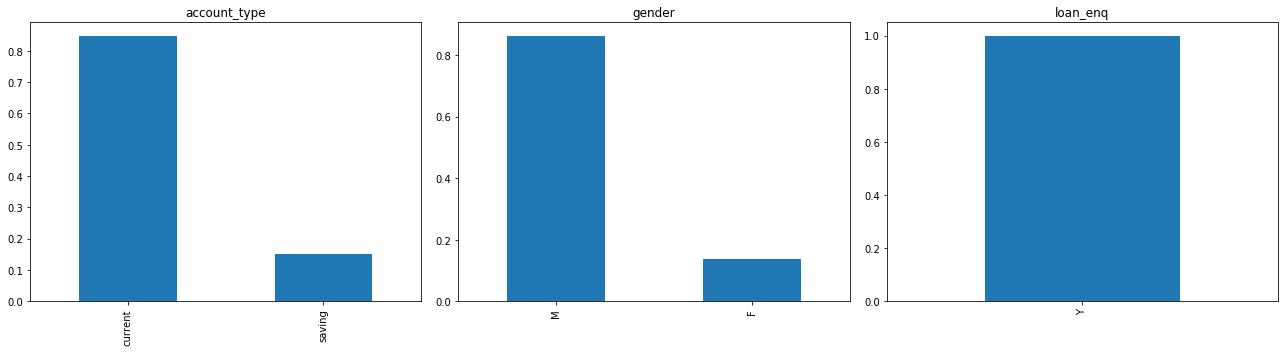

In [134]:
 for i in range(0,len(cat_cols),2):
            if len(cat_cols) > i+1:
                
                plt.figure(figsize=(18,5))
                plt.subplot(131)
                df[cat_cols[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(cat_cols[i])
                plt.subplot(132)     
                df[cat_cols[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(cat_cols[i+1])
                plt.subplot(133)
                df[cat_cols[i+2]].value_counts(normalize=True).plot(kind='bar')
                plt.title(cat_cols[i+2])
                plt.tight_layout()
                plt.show()

### <b> `Observations from Categorical Columns: ` <b>
    1. The account type of more than 80% of bank customers is current and less than 15% have a savings account
    2. The gender of majority of bank customers is Male and less than 20% are female customers.
    3. ALl the bank customers have done a lone enquiry with the bank. These column doesn't give us any trend and should be dropped.

In [291]:
df.drop('loan_enq',axis =1 ,inplace = True)

In [292]:
cat_cols_updated = df.select_dtypes(include ='object').columns 

#### <b> `Age Distribution` <b>

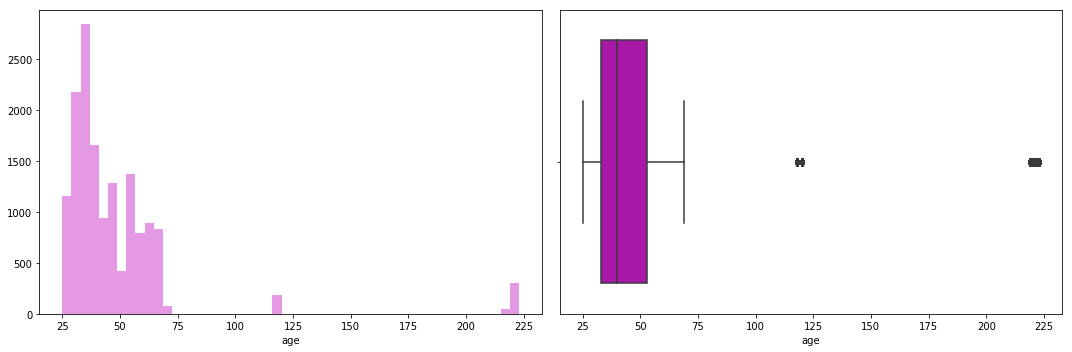

In [238]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['age'], kde=False,color ='m')
plt.subplot(122)            
sns.boxplot(df['age'],color ='m')
plt.tight_layout()
plt.show() 

    1. It can be observed 95% of the customers are from the age group of 25 to 70 and the reamining 5 % are outliers as seen in te above graph.
    2. Some outliers are extreme with age greater than 200.
    3. Majority of them are in the 30-40 age bracket and the the graph is right skewed.

#### <b> `Region code Distribution` <b>

In [136]:
df['region_code'].nunique()

210

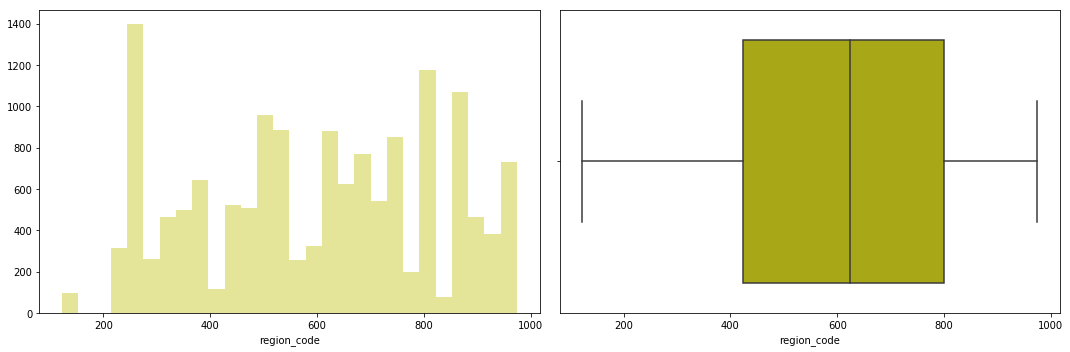

In [239]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['region_code'], kde=False,color ='y')
plt.subplot(122)            
sns.boxplot(df['region_code'],color ='y')
plt.tight_layout()
plt.show()           

### <b> `Plotting a histogram of count columns` :<b>

In [138]:
transaction_count_cols = ['cc_count_apr','dc_count_apr','cc_count_may','dc_count_may','cc_count_jun','dc_count_jun']
df[transaction_count_cols] = df[transaction_count_cols].astype(int)

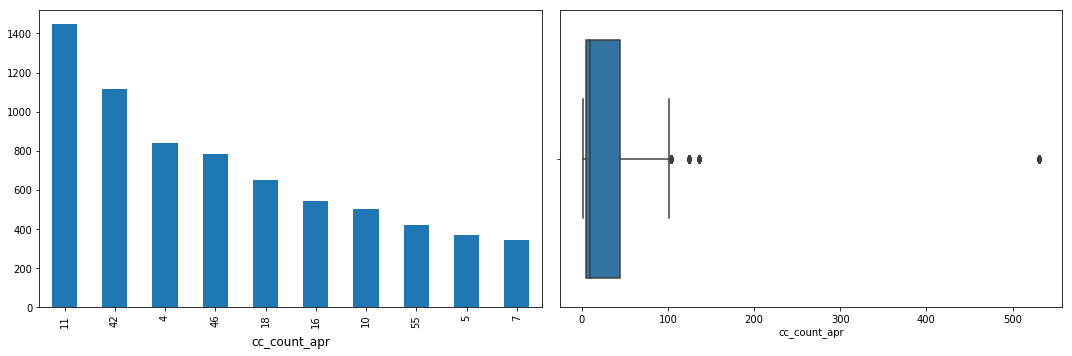

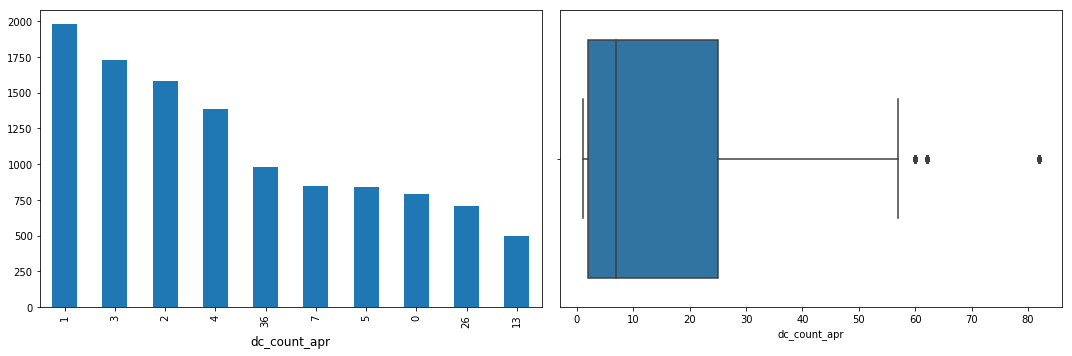

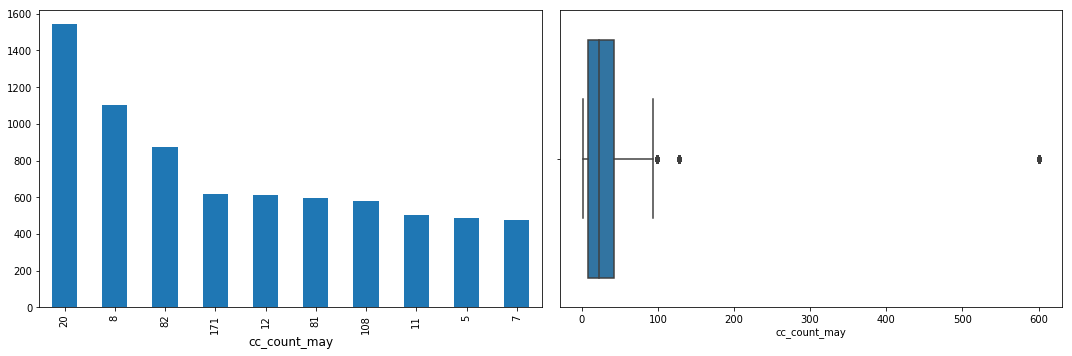

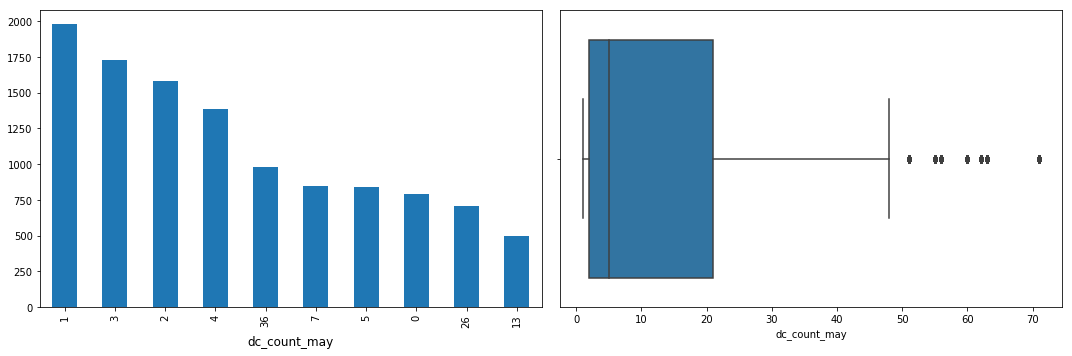

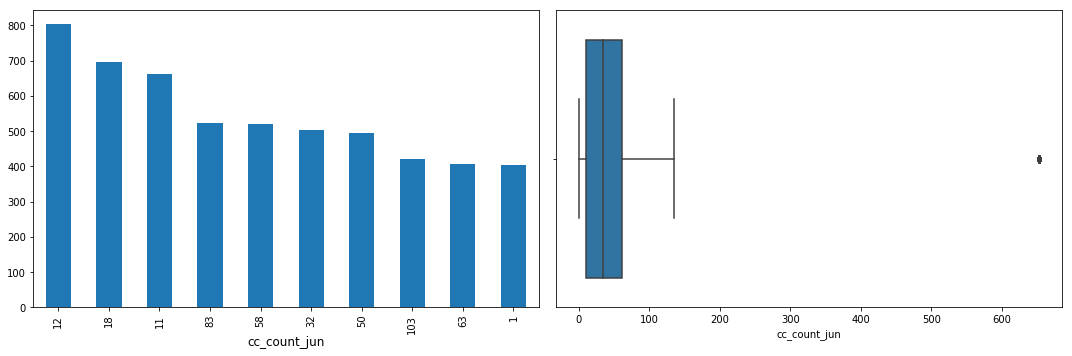

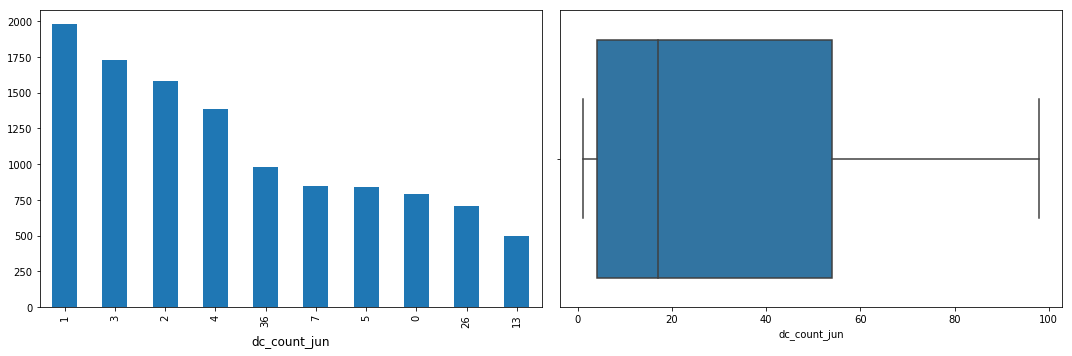

In [344]:
for i in range(0,len(transaction_count_cols),1):
        if len(transaction_count_cols) > i:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            #sns.distplot(df[transaction_count_cols[i]], kde=False)
            df[total_count_cols[i]].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
            plt.title(transaction_count_cols[i],y=-0.15)
            plt.subplot(122)            
            sns.boxplot(df[transaction_count_cols[i]])
            plt.tight_layout()
            plt.show()

#### <b> `Observations from Count Plot and Box Plot` <b>
    1. We can see from the above graphs that credit card count has a much wider range than debit card count.
    2. The credit card transaction count is heavily skewed due to presence of large outliers with count values over 600.
    3. The debit card transaction count is also right skewed but has max count value less than 100.
    

### <b> `Credit and Debit Card Spend ` <b>

In [141]:
spend_cols = ['cc_cons_apr','dc_cons_apr','cc_cons_may','dc_cons_may','cc_cons_jun','dc_cons_jun']

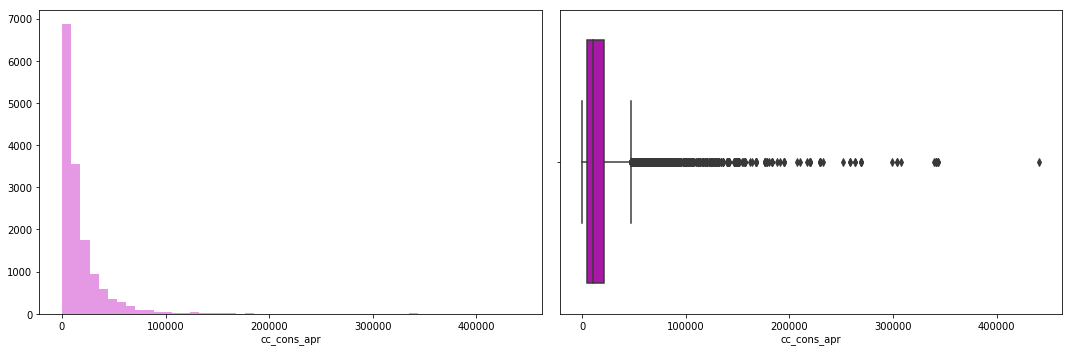

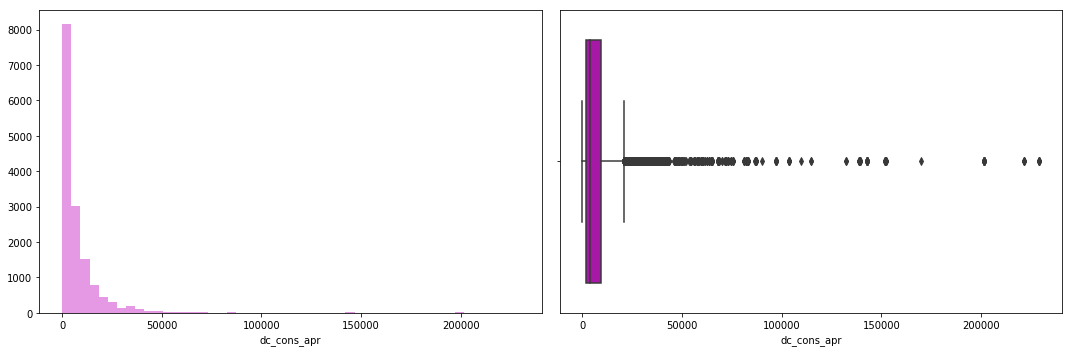

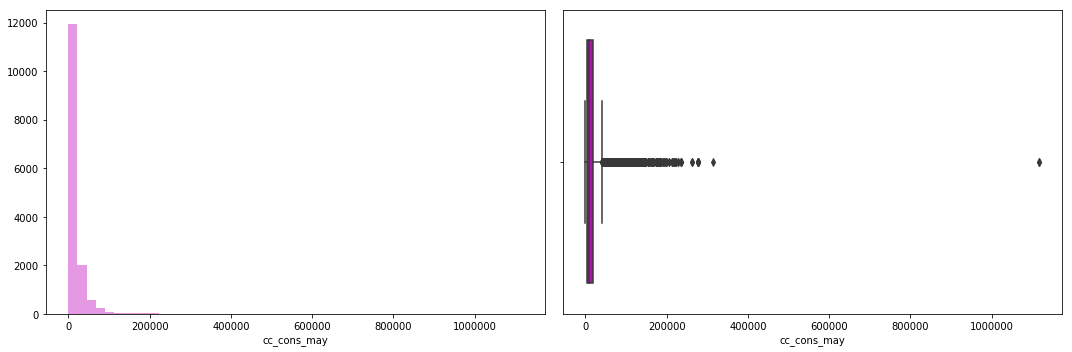

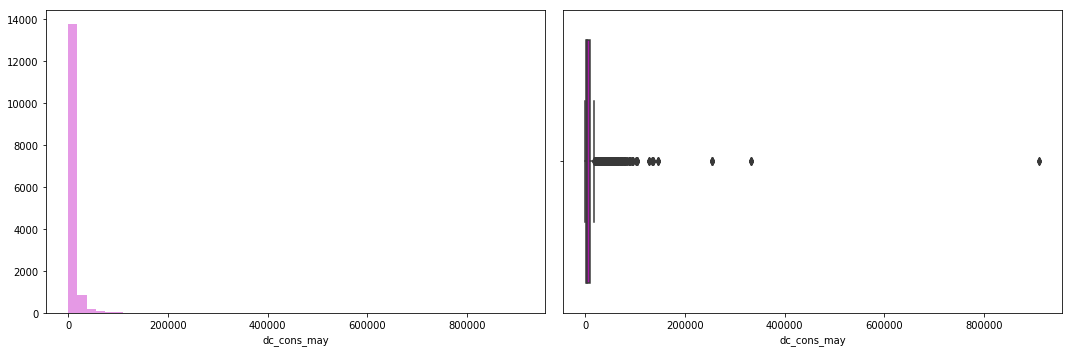

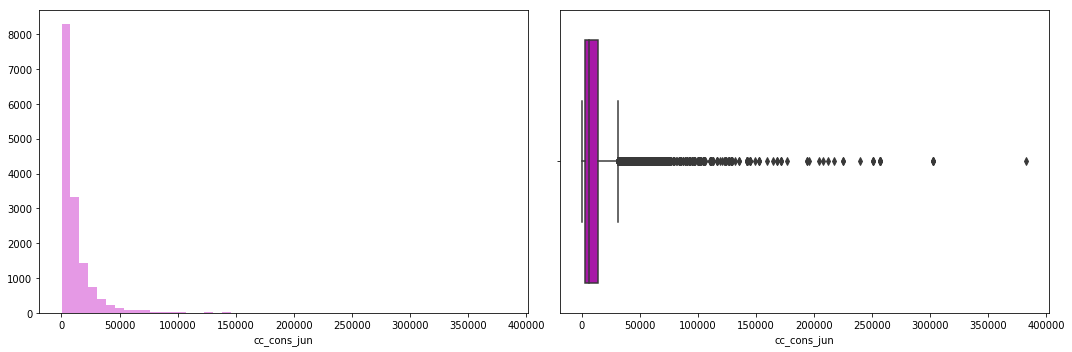

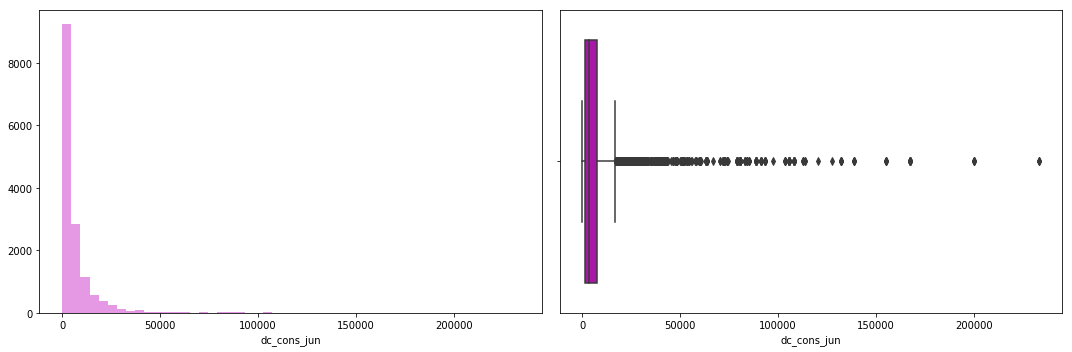

In [240]:
for i in range(0,len(spend_cols),1):
        if len(spend_cols) > i:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.distplot(df[spend_cols[i]], kde=False,color ='m')
            plt.subplot(122)            
            sns.boxplot(df[spend_cols[i]],color = 'm')
            plt.tight_layout()
            plt.show()

#### <b> `Observations from Credit and Debit Card Spend `<b>
    1. From the above plots we can see the that maximum number of amounts spend usinhg credit or debit card are less than 50000.
    2. All distribution are right skewed with large outliers present. The range is particlarly large for the month of May with range extendig upto 10 lakh for credit card 
       8 lakh for debit card spend due to the presence of extreme outliers.

#### <b> ` Card Limit Distribution ` <b>

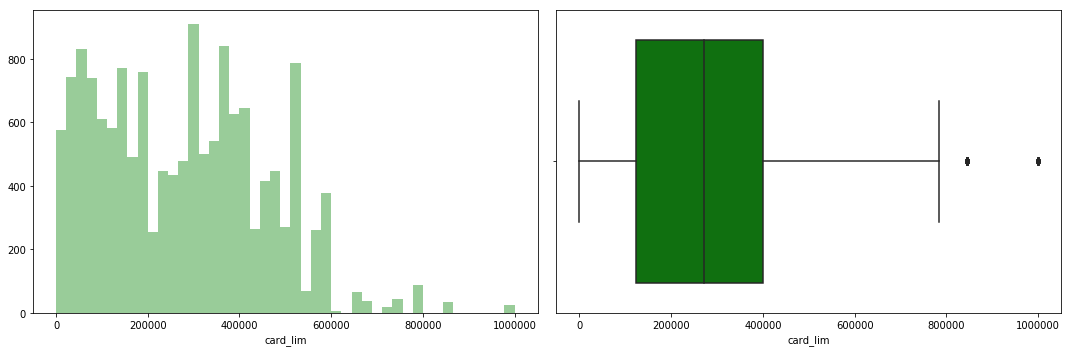

In [241]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['card_lim'], kde=False,color ='g')
plt.subplot(122)            
sns.boxplot(df['card_lim'],color ='g')
plt.tight_layout()
plt.show() 

    1. The card limit of majority customers is less than 6 lakhs
    2. There are some customers(extreme outliers) with maximum card limit upto 10 lakhs
    3. There are some customers who have card limit of 0 which is an incorrect value.

### <b> `Active and Closed Loans ` <b>

In [144]:
loan_cols = ['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed']

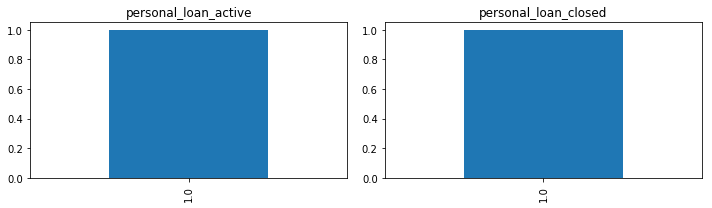

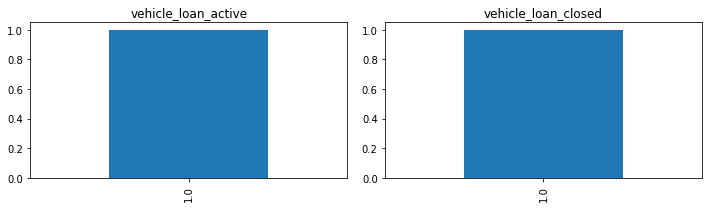

In [246]:
for i in range(0,len(loan_cols),2):
            if len(loan_cols) > i+1:
                
                plt.figure(figsize=(10,3))
                plt.subplot(121)
                df[loan_cols[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(loan_cols[i])
                plt.subplot(122)     
                df[loan_cols[i+1]].value_counts(normalize=True).plot(kind='bar',)
                plt.title(loan_cols[i+1])
                plt.tight_layout()
                plt.show()

#### <b> `Observation: `<b>
    1. No particular insight could be generated from the loan columns. They seem unimportant for predicting the average credit card spend and can be dropped.

In [256]:
df.drop(['vehicle_loan_active','vehicle_loan_closed','personal_loan_active','personal_loan_closed'],axis =1 ,inplace =True)

In [257]:
df.shape

(15000, 39)

### <b> `Investment Columns (June) `<b>

In [151]:
df= df.rename(columns = {"investment_1": "Demat", 
                         "investment_2":"Fixed Deposit", 
                         "investment_3": "Life Insurance",
                         "investment_4": "General Insurance"}) 
investment_cols = ['Demat','Fixed Deposit','Life Insurance','General Insurance']

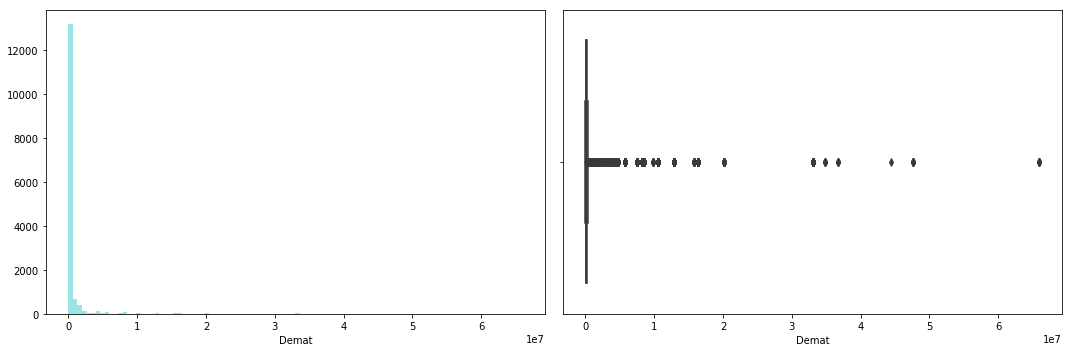

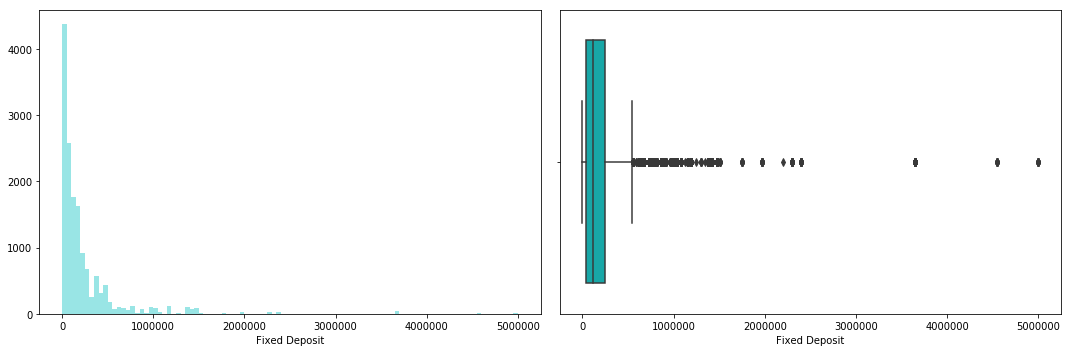

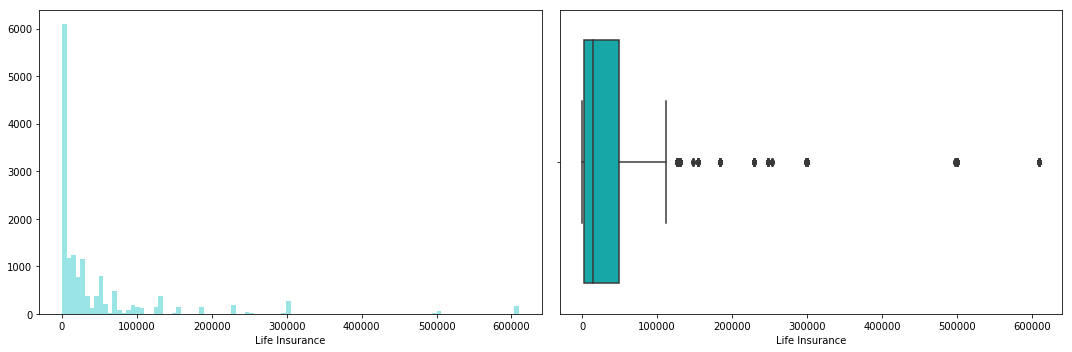

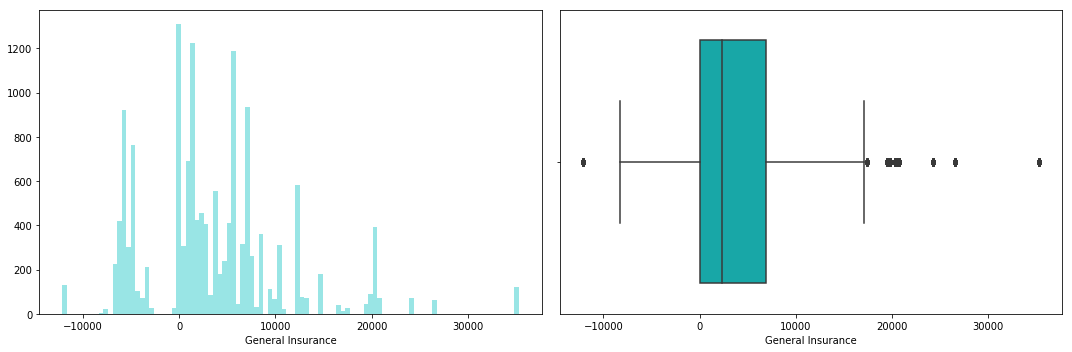

In [249]:
for i in range(0,len(investment_cols),1):
        if len(investment_cols) > i:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.distplot(df[investment_cols[i]],bins =100, kde=False,color ='c')
            plt.subplot(122)            
            sns.boxplot(df[investment_cols[i]],color ='c')
            plt.tight_layout()
            plt.show()

### <b> ` Total Amount Debited and Credited from Customer's account `

In [203]:
total_cols = ['debit_amount_apr','credit_amount_apr','debit_amount_may','credit_amount_may','debit_amount_jun','credit_amount_jun']

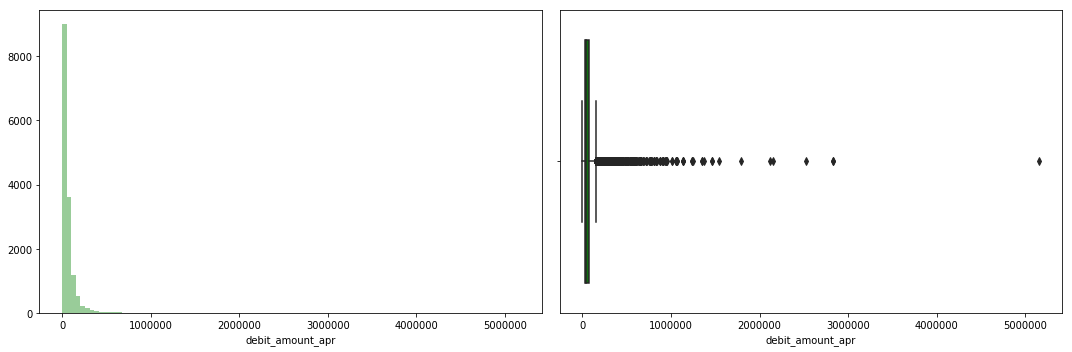

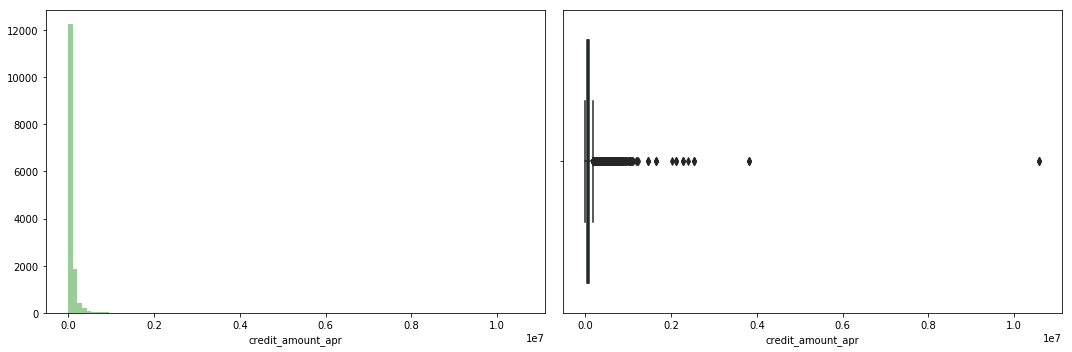

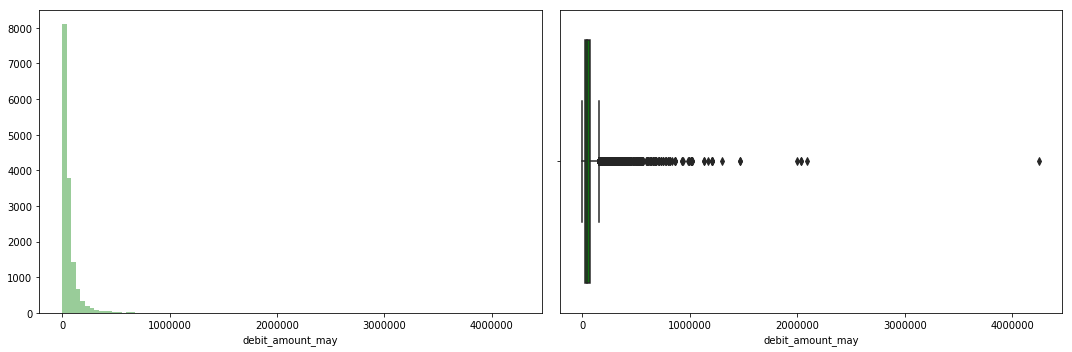

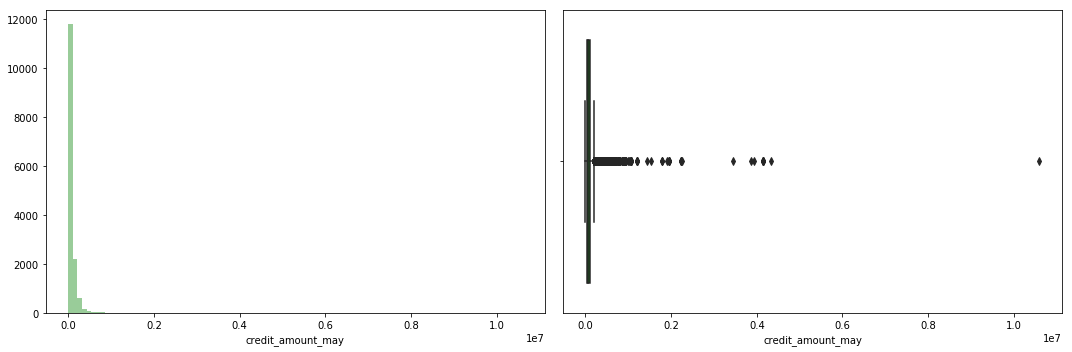

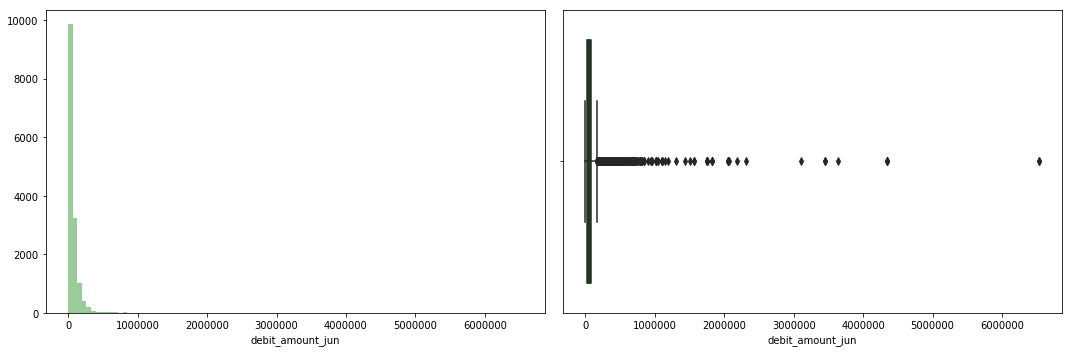

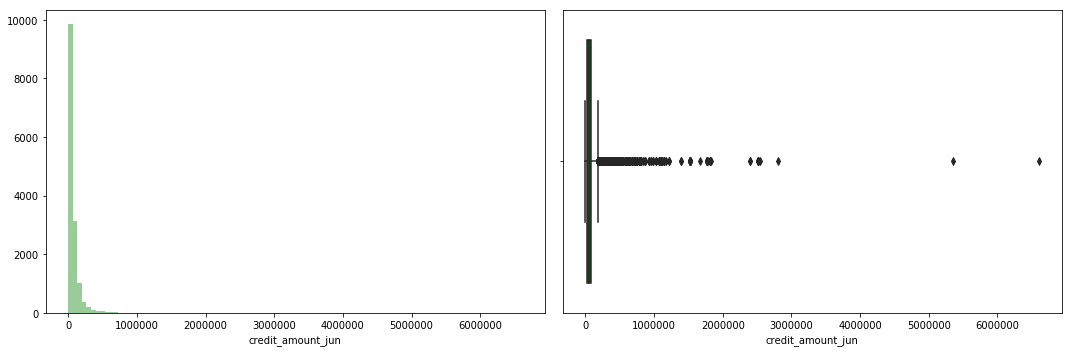

In [250]:
for i in range(0,len(total_cols),1):
        if len(total_cols) > i:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.distplot(df[total_cols[i]],bins =100, kde=False,color ='g')
            plt.subplot(122)            
            sns.boxplot(df[total_cols[i]],color ='g')
            plt.tight_layout()
            plt.show()

 `The Total amount debited and credited columns are heavily right skewed with extreme outliers present which need to be treated.`

### <b> `Total Number of times amount debited or credited`

In [224]:
total_count_cols = ['debit_count_apr','credit_count_apr','debit_count_may','credit_count_apr','debit_count_jun','credit_count_apr']

In [213]:
df[total_count_cols] = df[total_count_cols].astype(int)

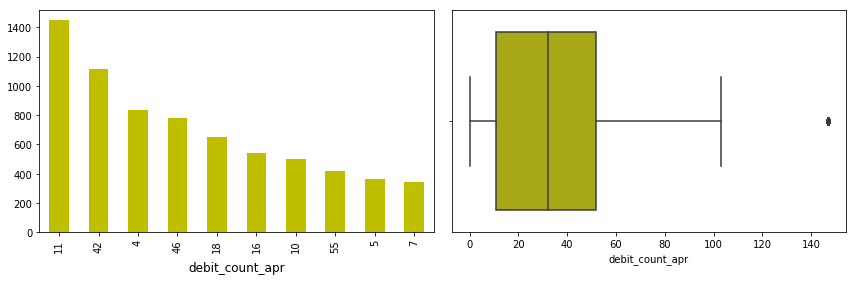

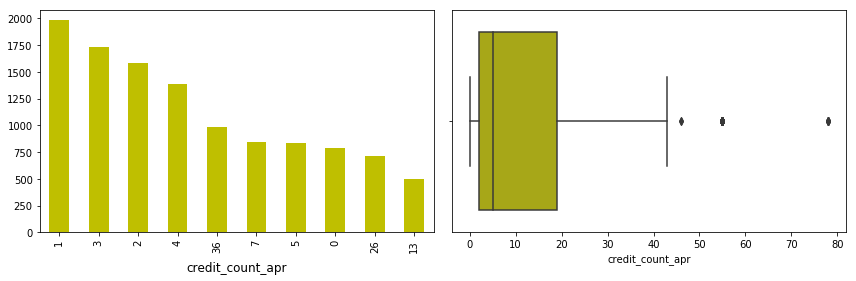

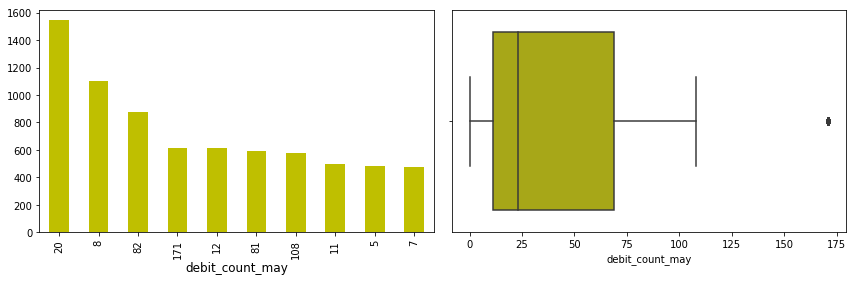

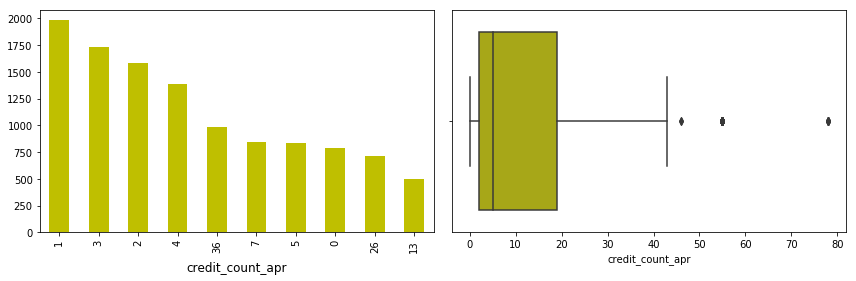

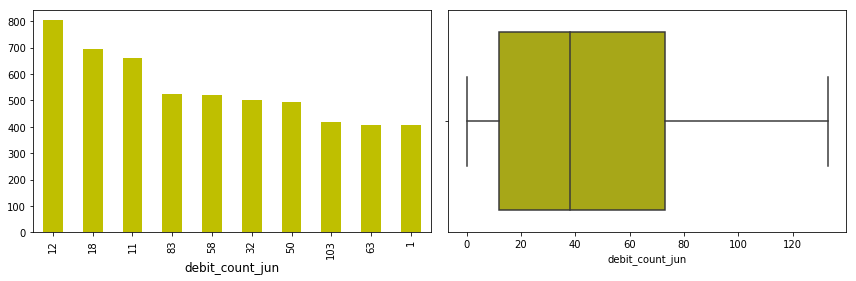

In [341]:
for i in range(0,len(total_count_cols),1):
        if len(total_count_cols) > i+1:
            plt.figure(figsize=(12,4))
            plt.subplot(121)
            #sns.distplot(df[total_count_cols[i]], kde=False,color ='y')
            df[total_count_cols[i]].value_counts().sort_values(ascending = False).head(10).plot(kind='bar',color = 'y')
            plt.title(total_count_cols[i],y=-0.2)
            plt.subplot(122)            
            sns.boxplot(df[total_count_cols[i]],color ='y')
            plt.tight_layout()
            plt.show()

#### <b> `Observations :` 
      1. The total number of times amount is debited in each month is higher than the number of times amount was credited to a customer's account.

### <b> `Maximum Amount Credited ` <b>

In [207]:
max_cols = ['max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']

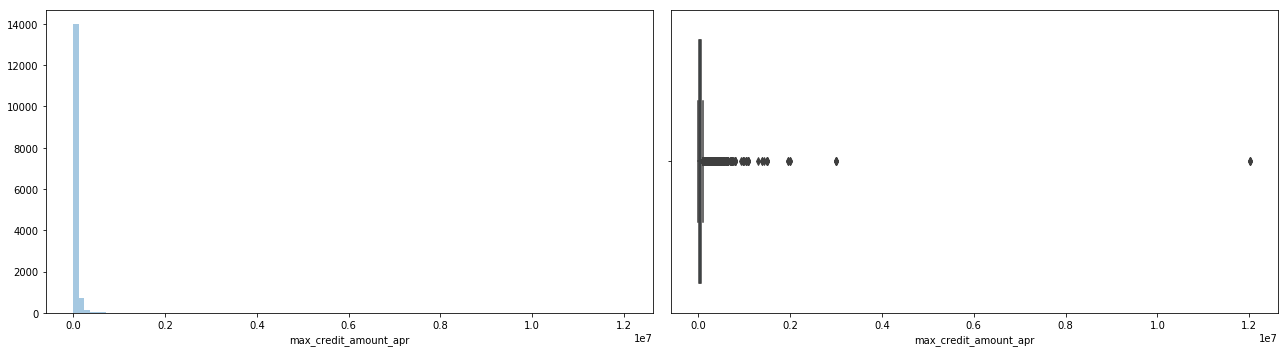

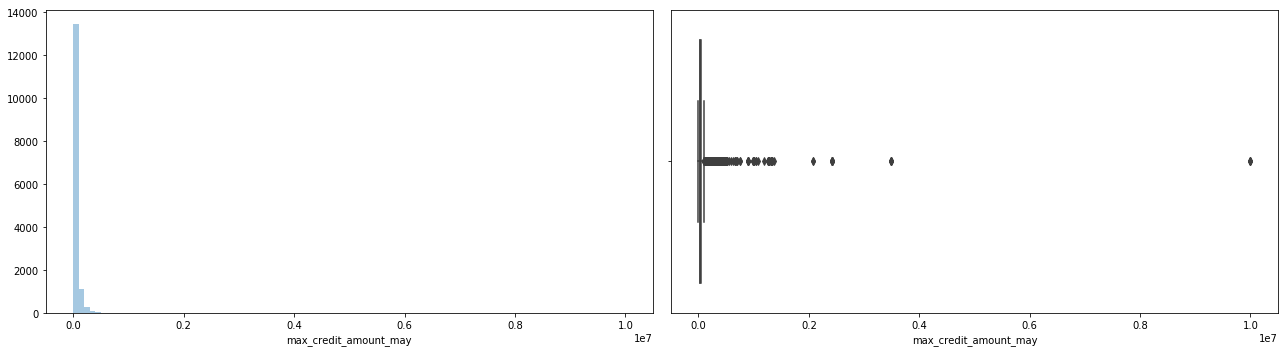

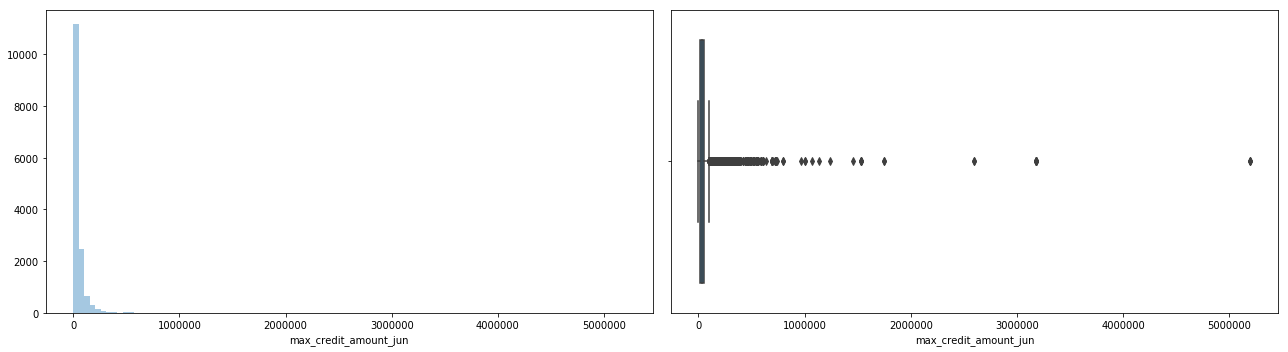

In [252]:
 for i in range(0,len(max_cols),1):
            if len(max_cols) > i:
                
                plt.figure(figsize=(18,5))
                plt.subplot(121)
                sns.distplot(df[max_cols[i]],bins =100, kde=False)
                plt.subplot(122)     
                sns.boxplot(df[max_cols[i]])
                plt.tight_layout()
                plt.show()

## <b> `Active EMI Distribution`

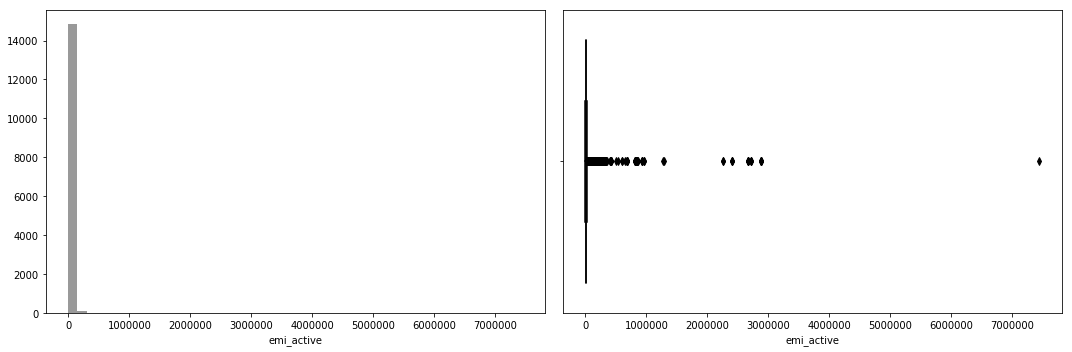

In [254]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['emi_active'], kde=False,color ='k')
plt.subplot(122)            
sns.boxplot(df['emi_active'],color ='k')
plt.tight_layout()
plt.show()           

## <b> ` Target Distribution `

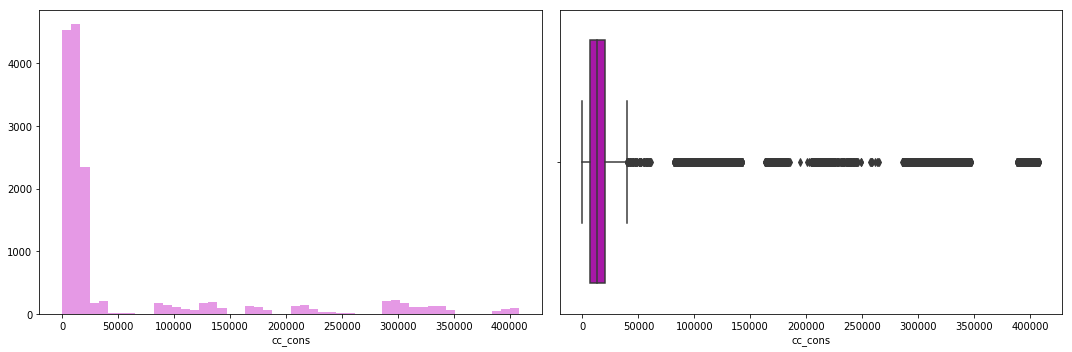

In [255]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['cc_cons'], kde=False,color ='m')
plt.subplot(122)            
sns.boxplot(df['cc_cons'],color ='m')
plt.tight_layout()
plt.show()   

` Majority of Target column (cc_cons) values lie in range between 0 to 50000 and the distribution is highly skewed to right. There are extreme outliers present`

## <b> Bivariate Analysis <b> 

## <b> `Account Type and Gender`

account_type


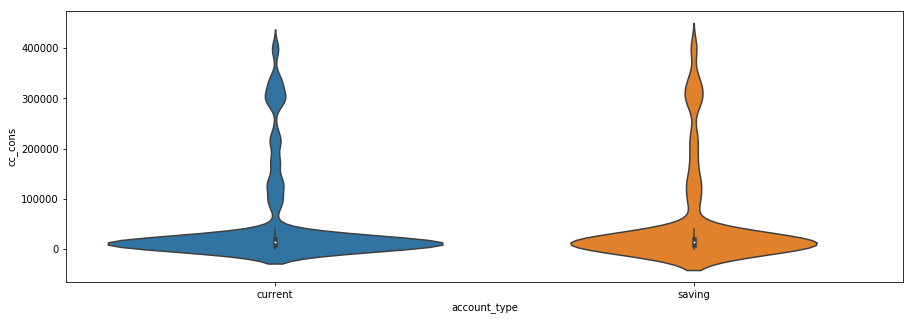

gender


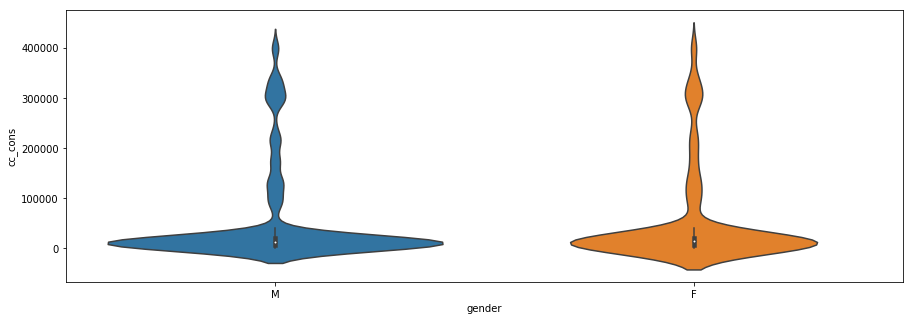

In [293]:
for col in cat_cols_updated:
    plt.figure(figsize=(15,5))
    print(col)
    sns.violinplot(df[col],df['cc_cons'])
    plt.show()

#### `Age`

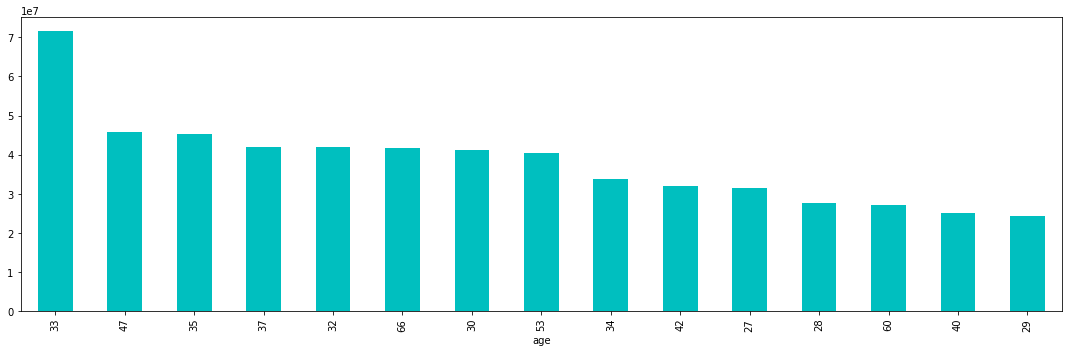

In [317]:
plt.figure(figsize=(15,5))
df.groupby('age').sum().unstack().cc_cons.sort_values(ascending=False).head(15).plot(kind='bar',color ='c')
plt.tight_layout()
plt.show() 

### `Region Code` 

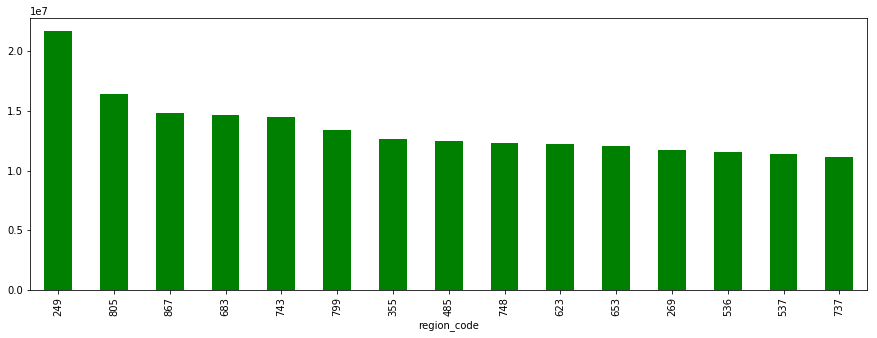

In [329]:
plt.figure(figsize=(15,5))
df.groupby('region_code').sum().unstack().cc_cons.sort_values(ascending=False).head(15).plot(kind='bar',color ='g')

### `Number of Debit and Credit Card Transaction compared to Credit card Consumption Average`

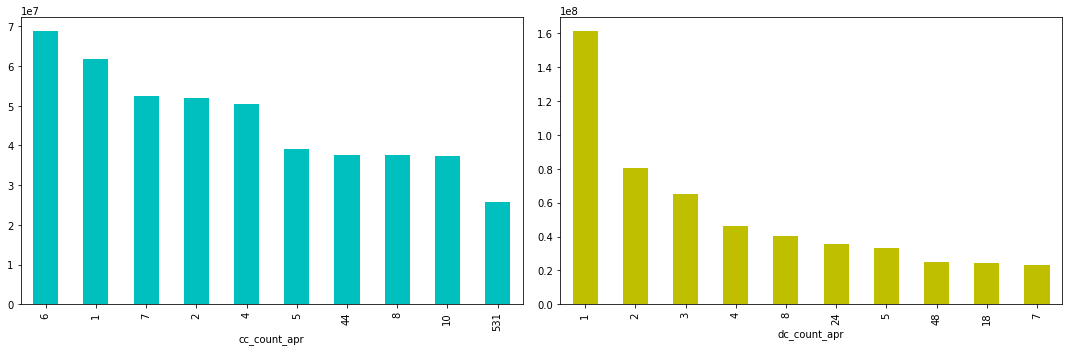

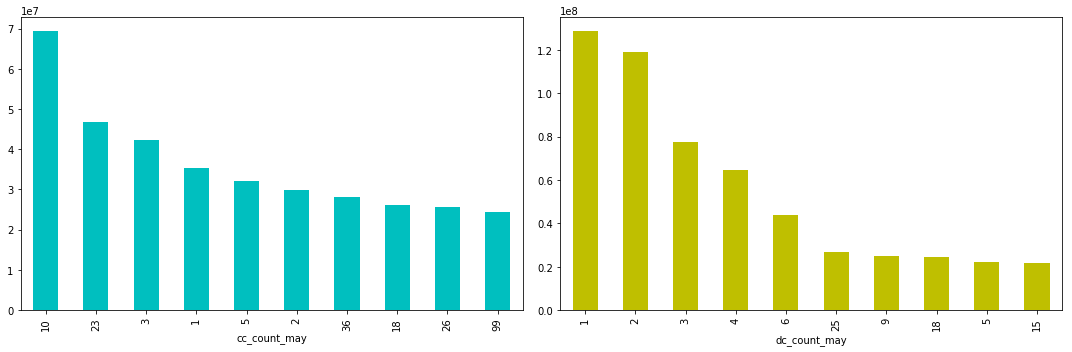

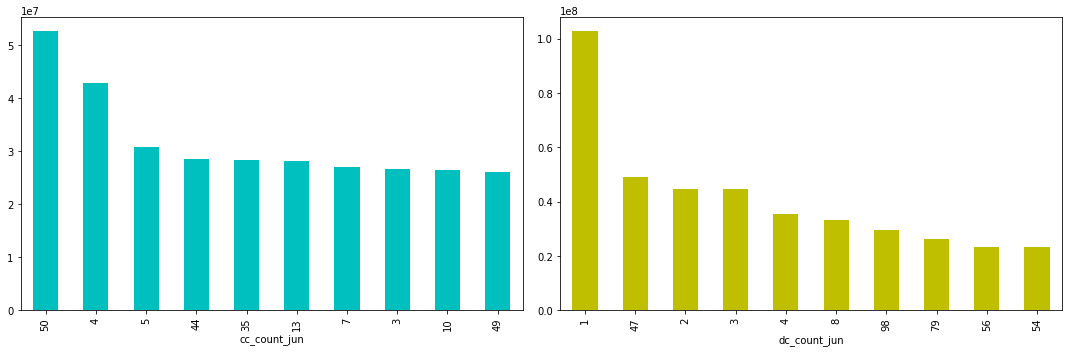

In [328]:
for i in range(0,len(transaction_count_cols),2):
        if len(transaction_count_cols) > i+1:                
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            df.groupby(transaction_count_cols[i]).sum().unstack().cc_cons.sort_values(ascending=False).head(10).plot(kind='bar',color ='c')
            plt.subplot(122)
            df.groupby(transaction_count_cols[i+1]).sum().unstack().cc_cons.sort_values(ascending=False).head(10).plot(kind='bar',color ='y')
            #sns.boxplot(x =transaction_count_cols[i],y ='cc_cons', data =df)
            plt.tight_layout()
            plt.show() 
            

In [347]:
print(spend_cols)

['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun']


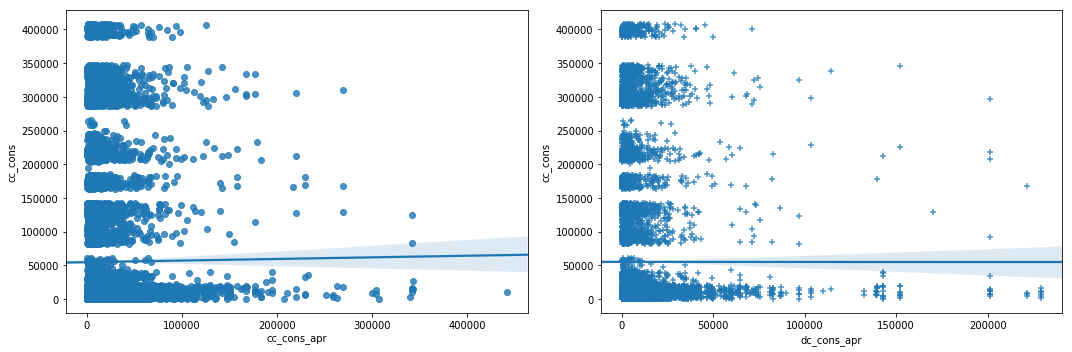

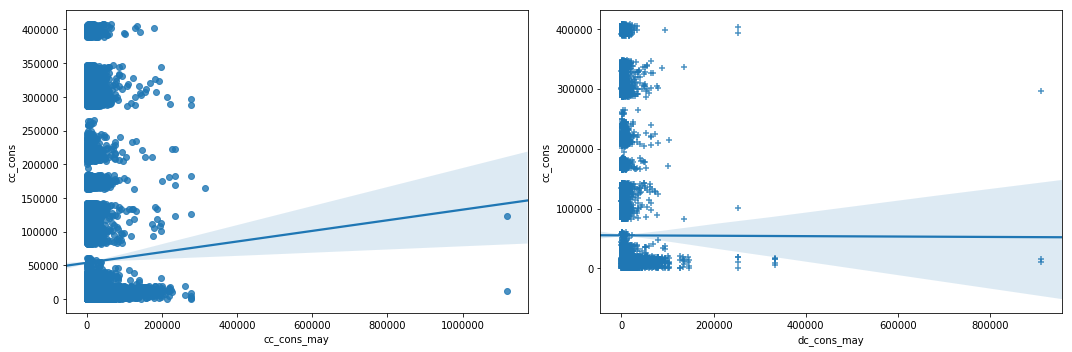

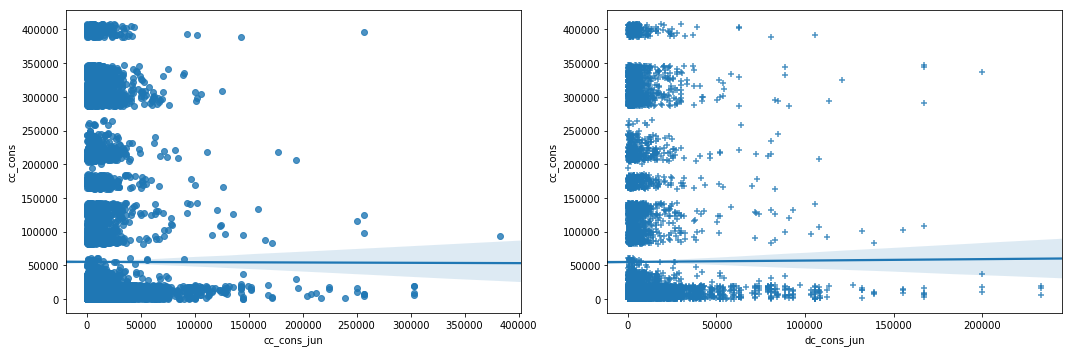

In [332]:
for i in range(0,len(spend_cols),2):
        if len(spend_cols) > i+1:                
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.regplot(x = df[spend_cols[i]],y = df.cc_cons, marker = 'o')
            plt.subplot(122)
            sns.regplot(x = df[spend_cols[i+1]],y = df.cc_cons, marker = '+')
            #sns.boxplot(x =transaction_count_cols[i],y ='cc_cons', data =df)
            plt.tight_layout()
            plt.show() 

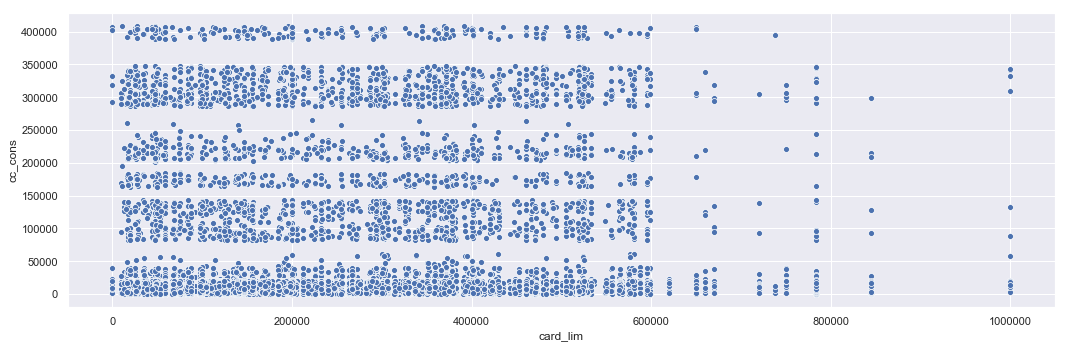

In [350]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.scatterplot(x = df['card_lim'],y = df.cc_cons, marker = 'o')
plt.tight_layout()
plt.show() 

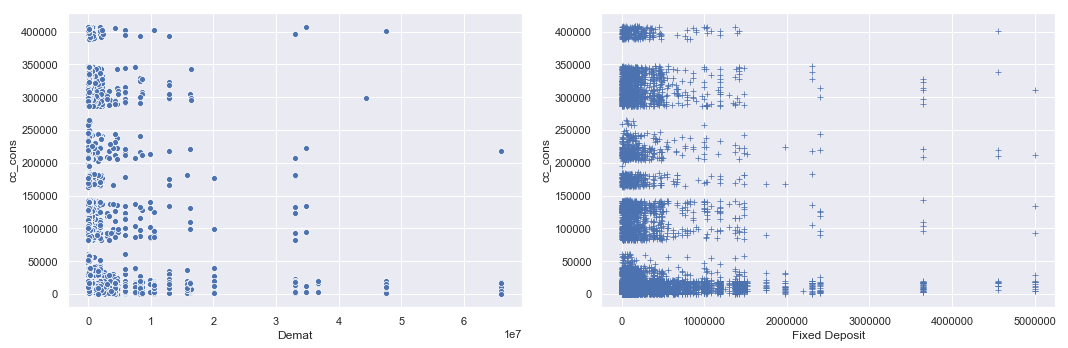

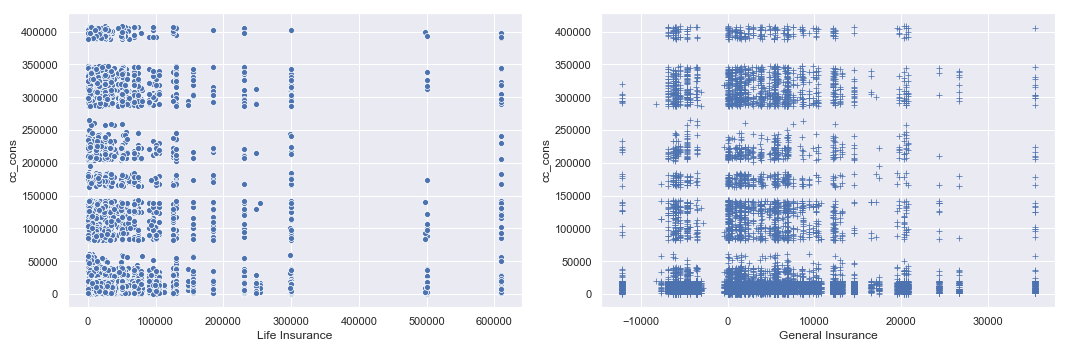

In [355]:
for i in range(0,len(investment_cols),2):
        if len(spend_cols) > i+1:                
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.scatterplot(x = df[investment_cols[i]],y = df.cc_cons, marker = 'o')
            plt.subplot(122)
            sns.scatterplot(x = df[investment_cols[i+1]],y = df.cc_cons, marker = '+')
            #sns.boxplot(x =transaction_count_cols[i],y ='cc_cons', data =df)
            plt.tight_layout()
            plt.show() 

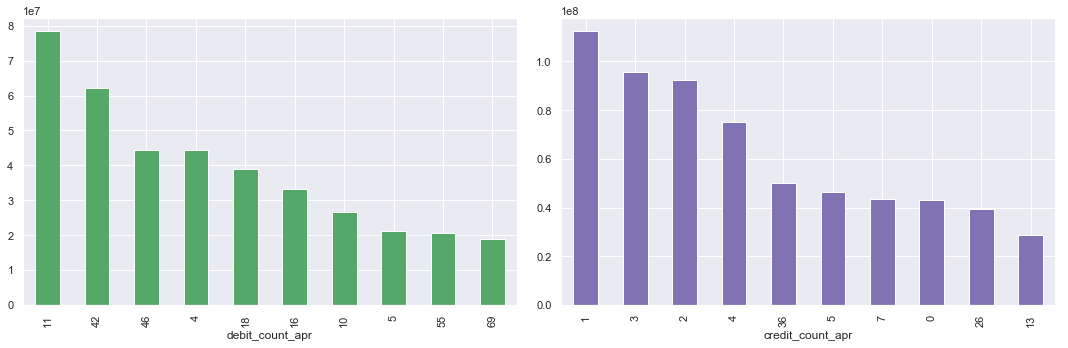

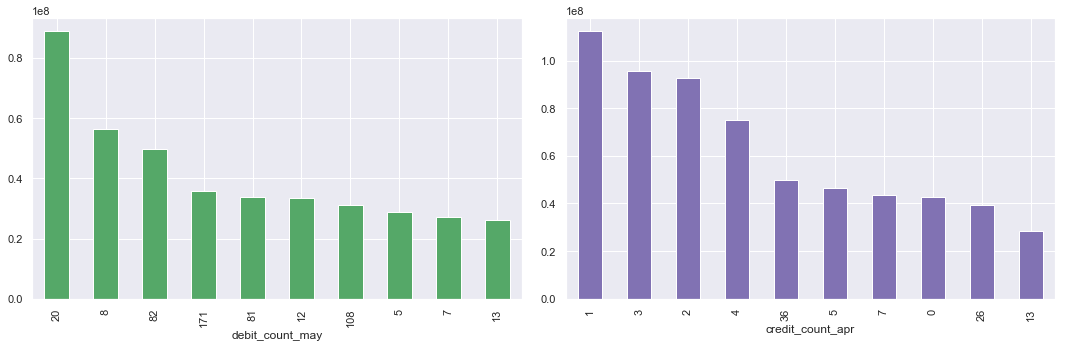

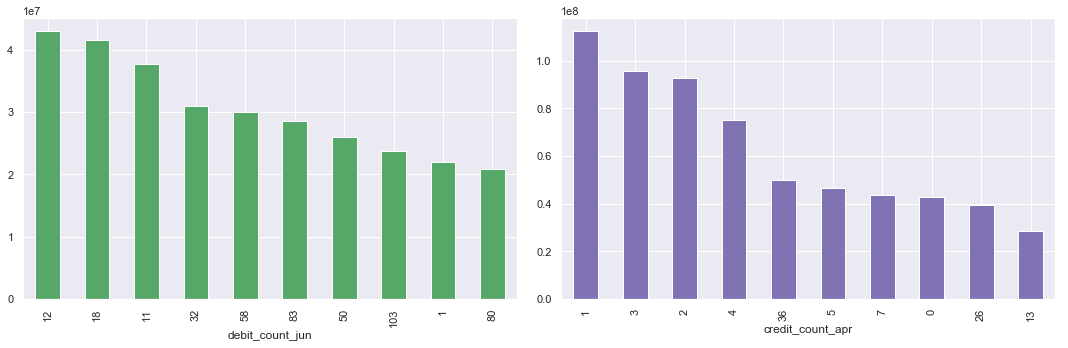

In [356]:
for i in range(0,len(total_count_cols),2):
        if len(total_count_cols) > i+1:                
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            df.groupby(total_count_cols[i]).sum().unstack().cc_cons.sort_values(ascending=False).head(10).plot(kind='bar',color ='g')
            plt.subplot(122)
            df.groupby(total_count_cols[i+1]).sum().unstack().cc_cons.sort_values(ascending=False).head(10).plot(kind='bar',color ='m')
            #sns.boxplot(x =transaction_count_cols[i],y ='cc_cons', data =df)
            plt.tight_layout()
            plt.show() 

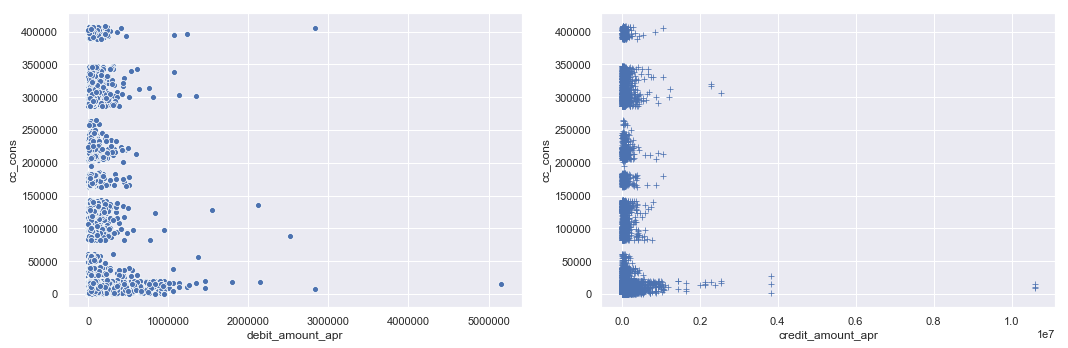

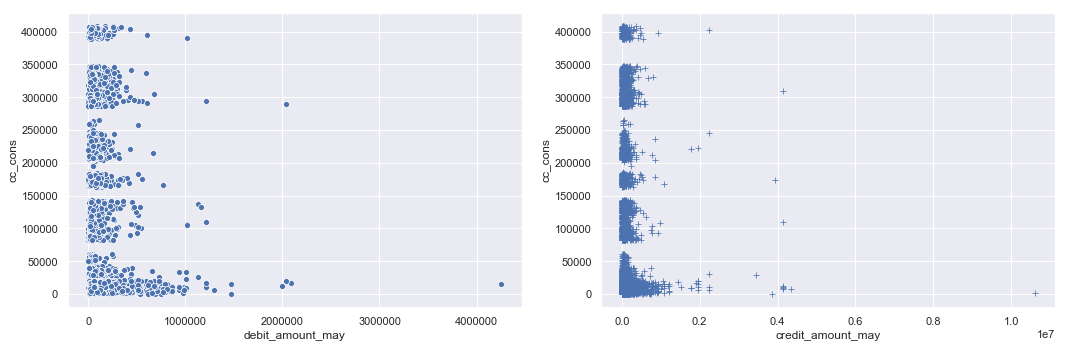

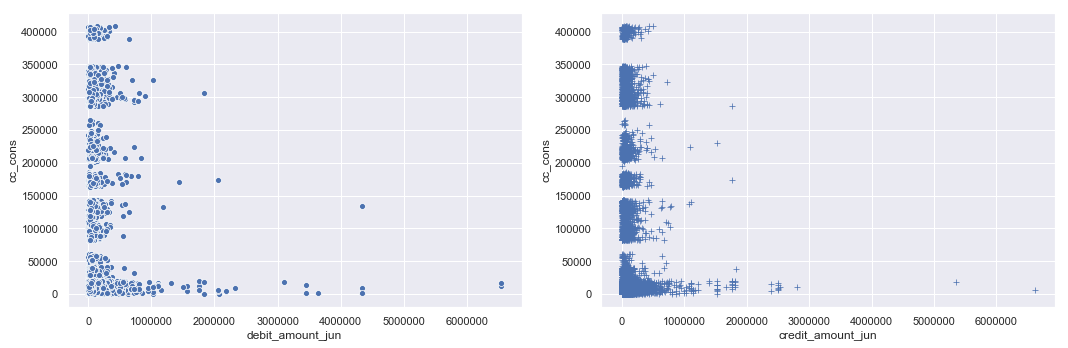

In [357]:
for i in range(0,len(total_cols),2):
        if len(total_cols) > i+1:                
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.scatterplot(x = df[total_cols[i]],y = df.cc_cons, marker = 'o')
            plt.subplot(122)
            sns.scatterplot(x = df[total_cols[i+1]],y = df.cc_cons, marker = '+')
            #sns.boxplot(x =transaction_count_cols[i],y ='cc_cons', data =df)
            plt.tight_layout()
            plt.show() 

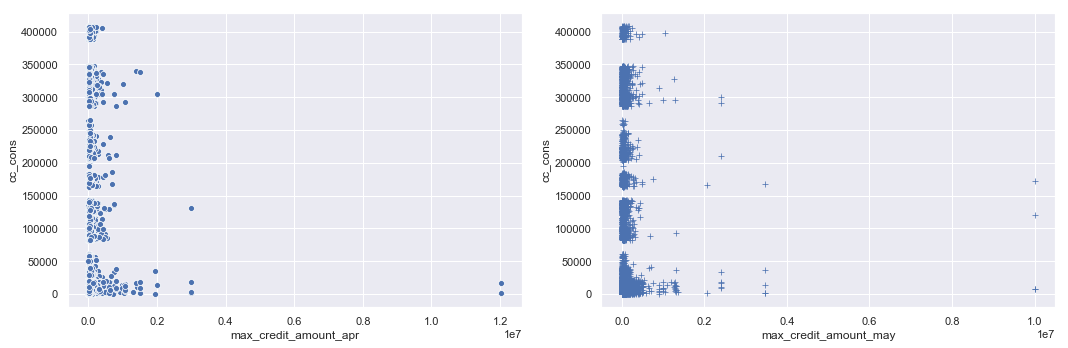

In [358]:
for i in range(0,len(max_cols),2):
        if len(max_cols) > i+1:                
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.scatterplot(x = df[max_cols[i]],y = df.cc_cons, marker = 'o')
            plt.subplot(122)
            sns.scatterplot(x = df[max_cols[i+1]],y = df.cc_cons, marker = '+')
            #sns.boxplot(x =transaction_count_cols[i],y ='cc_cons', data =df)
            plt.tight_layout()
            plt.show() 

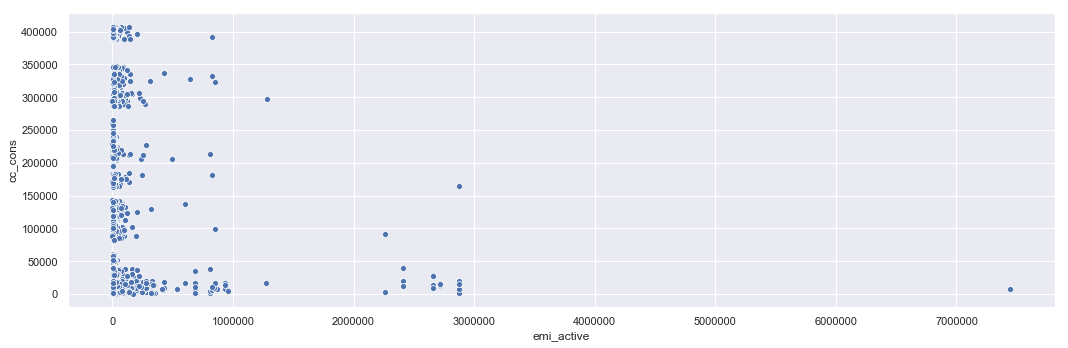

In [364]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['emi_active'],y = df.cc_cons, marker = 'o')
plt.tight_layout()
plt.show() 

### <b> `Feature Correaltion with Target`

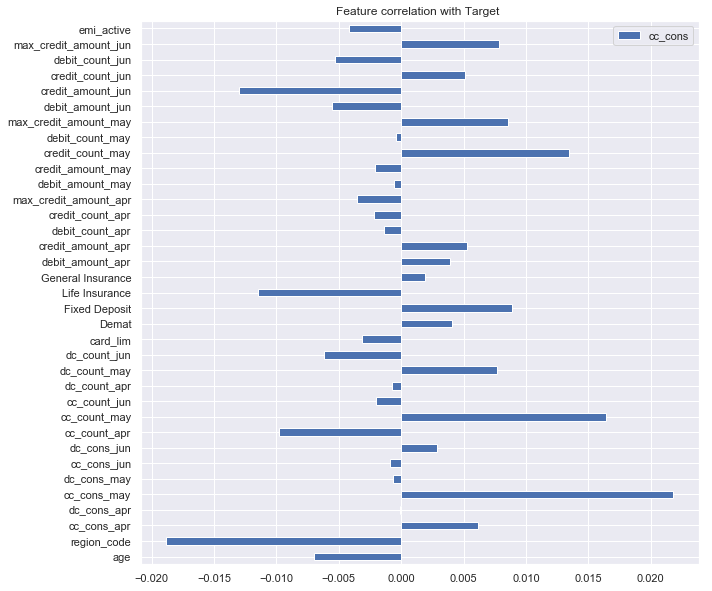

In [373]:
corr=pd.DataFrame(df.corr()['cc_cons'].drop('cc_cons'))
corr.plot(kind='barh',figsize=(10,10))
plt.title('Feature correlation with Target ')
plt.show()

### <b> `Finding Skew `

In [389]:
df.skew() 

age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
Demat                    11.603971
Fixed Deposit             5.475358
Life Insurance            4.075013
General Insurance         1.084492
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_apr    47.952438
debit_amount_may         10.296853
credit_amount_may        23.391690
credit_count_may          1.833915
debit_count_may           1.493358
max_credit_amount_ma

### <b> `Outlier Treatment `

In [390]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,age,534
1,region_code,0
2,cc_cons_apr,1217
3,dc_cons_apr,1220
4,cc_cons_may,1202
5,dc_cons_may,1248
6,cc_cons_jun,1181
7,dc_cons_jun,1366
8,cc_count_apr,883
9,cc_count_may,709


In [692]:
df_copy =pd.read_csv('Train.csv')

In [693]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(df_copy)

# Checking for outliers after applying winsorization
detect_outliers(df_copy)

,Feature,Number of Outliers
0,ID,0
1,age,0
2,region_code,0
3,cc_cons_apr,0
4,dc_cons_apr,0
5,cc_cons_may,0
6,dc_cons_may,0
7,cc_cons_jun,0
8,dc_cons_jun,0
9,cc_count_apr,0


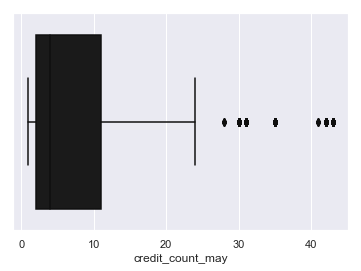

In [694]:
sns.boxplot(df_copy['credit_count_may'],color ='k')

In [695]:
(df_copy['credit_count_may'].quantile(0.75)  - df_copy['credit_count_may'].quantile(0.25))*1.5 + 11

24.5

### <b> `Treatment of pending outliers in below columns`

In [696]:
df_copy['credit_count_jun'] = winsorize(df_copy['credit_count_jun'] , limits=[0.05, 0.15],inclusive=(True, True))
df_copy['investment_1'] = winsorize(df_copy['investment_1'] , limits=[0.05, 0.15],inclusive=(True, True))
df_copy['investment_3'] = winsorize(df_copy['investment_3'] , limits=[0.05, 0.15],inclusive=(True, True))

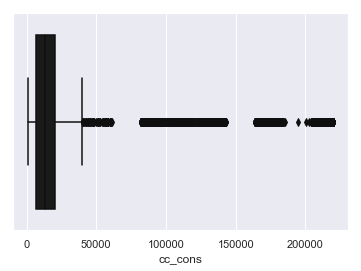

In [697]:
sns.boxplot(df_copy['cc_cons'],color ='k')

In [698]:
df_copy['cc_cons'] = winsorize(df_copy['cc_cons'] , limits=[0.05, 0.21],inclusive=(True, True))

In [699]:
df_copy['credit_count_may'] = winsorize(df_copy['credit_count_may'] , limits=[0.05, 0.18],inclusive=(True, True))

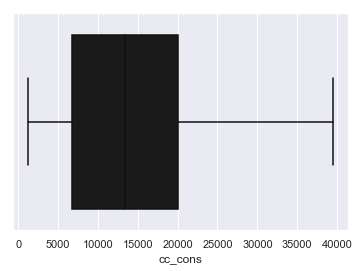

In [700]:
sns.boxplot(df_copy['cc_cons'],color ='k')

In [701]:
detect_outliers(df_copy)

,Feature,Number of Outliers
0,ID,0
1,age,0
2,region_code,0
3,cc_cons_apr,0
4,dc_cons_apr,0
5,cc_cons_may,0
6,dc_cons_may,0
7,cc_cons_jun,0
8,dc_cons_jun,0
9,cc_count_apr,0


In [702]:
df_copy.drop(['emi_active','personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis = 1,inplace= True)

In [703]:
df_copy.set_index('ID',inplace= True)

In [704]:
df_copy.shape

(15000, 37)

In [705]:
df_copy.skew() 

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              1.022063
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              1.088507
cc_count_apr             1.090164
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             1.108158
investment_2             0.903871
investment_3             0.825876
investment_4             0.006199
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         1.004090
max_credit_amount_apr    1.002865
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         1.091688
debit_count_may          0.577601
max_credit_amount_may    0.942760
debit_amount_j

### ` Treating Negative values in investment_4 column`

In [706]:
(df_copy['investment_4'] < 0).sum()

3225

12415.0


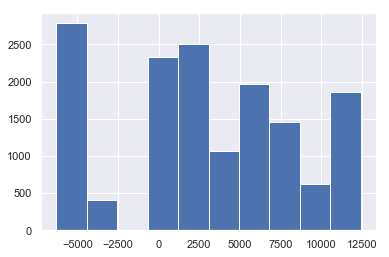

In [707]:
df_copy['investment_4'].hist()
print(df_copy.investment_4.max())

In [708]:
df_copy['investment_4'] = df_copy['investment_4'].apply(lambda x : -x if (x < 0) else x)

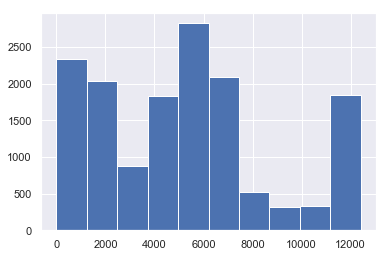

In [709]:
df_copy['investment_4'].hist()

In [710]:
print(df_copy.investment_1 .max())

360978.37


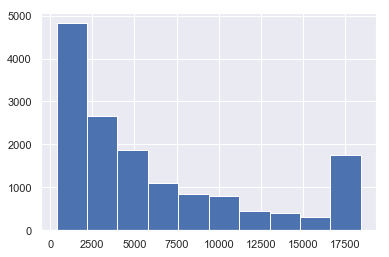

In [711]:
df_copy['dc_cons_apr'].hist()

### ` Decision Tree`

In [712]:
X=df_copy.drop('cc_cons',axis=1)
y=df_copy.cc_cons
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [713]:
for col in cat_cols_updated:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [737]:
X_train.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11161,0,1,28,536,2123.80,3422.00,1043.04,16077.96,15137.980,2738.00,43.0,27.0,67.0,1.0,6.0,2.0,378000.0,39851.93,470000.00,73217.0,6281.37988,63327.00,7196.00,82.0,35.0,38900.0,66756.23,110030.00,7.0,82.0,65846.0,57535.98,31701.0,2.0,65.0,38710.0
1356,0,1,53,595,7769.64,2472.15,4853.00,2354.61,12762.845,6148.00,1.0,36.0,30.0,24.0,44.0,8.0,27000.0,166331.66,195506.79,68000.0,5439.00000,20167.22,7196.00,52.0,0.0,26465.0,42201.00,67872.00,1.0,20.0,17445.0,105447.00,45225.0,19.0,7.0,37569.0
2523,1,1,28,324,8751.85,3846.00,11166.66,2467.99,15339.780,2825.00,6.0,34.0,53.0,1.0,4.0,47.0,44000.0,33784.35,118976.00,4000.0,9827.00000,67783.47,154070.50,20.0,11.0,28787.0,60203.64,28774.00,24.0,82.0,29750.0,67179.20,141143.0,46.0,50.0,64626.0
14843,0,1,62,801,19301.78,1958.00,2760.00,11379.10,19843.000,463.73,12.0,83.0,29.0,35.0,2.0,17.0,345000.0,6100.00,18300.00,73217.0,5942.00000,35789.48,37586.62,3.0,1.0,38822.0,115987.90,117696.95,3.0,8.0,24446.0,149576.73,43474.0,18.0,18.0,13800.0
17448,1,1,55,385,7982.54,7890.80,10401.57,5282.00,9812.000,3314.00,5.0,28.0,30.0,5.0,4.0,13.0,27000.0,526.25,358480.64,583.0,1954.00000,31383.60,68223.00,82.0,3.0,42007.0,26807.39,10138.00,6.0,14.0,102500.0,53869.40,110301.0,5.0,103.0,1789.0


In [741]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4,random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [742]:
tree_predictions = dt.predict(X_test) 

In [743]:
Accuracy = dt.score(X_test,y_test)
print(Accuracy)

-0.01056435108335374


In [744]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [745]:
rmsle((np.exp(y_test)-1),(np.exp(tree_predictions)-1))

nan

In [720]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=X_train.columns, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

KeyboardInterrupt: 

In [721]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [722]:
r2_score(y_test,tree_predictions)

-1.084014374264116

## `LINEAR MODEL`

In [723]:
df_copy_2 = df_copy.copy()

In [724]:
df_copy_2.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,16077.96,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,593.20,1631.11,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,172336.00,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,20014.0
17645,current,M,35,249,18941.62,966.00,20672.00,411.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,213557.15,172678.56,73217.0,1500.0,12255.75,88693.37,35.0,35.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,10173.0
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,85.0,4.0,1.0,79.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,2.0,27036.0,16095.0
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,2.0,50.0,1.0,1.0,10.0,155000.0,81872.65,223379.40,48500.0,4679.0,11558.23,154070.50,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,7707.0
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,50.0,16.0,68.0,297000.0,568.80,385000.00,73217.0,6916.0,17022.81,58897.03,46.0,35.0,19613.0,136301.61,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,39456.0


In [725]:
X=df_copy_2.drop('cc_cons',axis=1)
y=df_copy_2.cc_cons
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [726]:
for col in cat_cols_updated:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [727]:
X_train.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11161,0,1,28,536,2123.80,3422.00,1043.04,16077.96,15137.980,2738.00,43.0,27.0,67.0,1.0,6.0,2.0,378000.0,39851.93,470000.00,73217.0,6281.37988,63327.00,7196.00,82.0,35.0,38900.0,66756.23,110030.00,7.0,82.0,65846.0,57535.98,31701.0,2.0,65.0,38710.0
1356,0,1,53,595,7769.64,2472.15,4853.00,2354.61,12762.845,6148.00,1.0,36.0,30.0,24.0,44.0,8.0,27000.0,166331.66,195506.79,68000.0,5439.00000,20167.22,7196.00,52.0,0.0,26465.0,42201.00,67872.00,1.0,20.0,17445.0,105447.00,45225.0,19.0,7.0,37569.0
2523,1,1,28,324,8751.85,3846.00,11166.66,2467.99,15339.780,2825.00,6.0,34.0,53.0,1.0,4.0,47.0,44000.0,33784.35,118976.00,4000.0,9827.00000,67783.47,154070.50,20.0,11.0,28787.0,60203.64,28774.00,24.0,82.0,29750.0,67179.20,141143.0,46.0,50.0,64626.0
14843,0,1,62,801,19301.78,1958.00,2760.00,11379.10,19843.000,463.73,12.0,83.0,29.0,35.0,2.0,17.0,345000.0,6100.00,18300.00,73217.0,5942.00000,35789.48,37586.62,3.0,1.0,38822.0,115987.90,117696.95,3.0,8.0,24446.0,149576.73,43474.0,18.0,18.0,13800.0
17448,1,1,55,385,7982.54,7890.80,10401.57,5282.00,9812.000,3314.00,5.0,28.0,30.0,5.0,4.0,13.0,27000.0,526.25,358480.64,583.0,1954.00000,31383.60,68223.00,82.0,3.0,42007.0,26807.39,10138.00,6.0,14.0,102500.0,53869.40,110301.0,5.0,103.0,1789.0


In [684]:
X_train.shape

(12000, 36)

In [728]:
scalar =MinMaxScaler()
scalar.fit(X_train)
x_train_scale = scalar.transform(X_train)
x_test_scale = scalar.transform(X_test)

In [686]:
pd.DataFrame(x_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.149833,0.865250,0.425632,0.542008,0.336876,0.322198,0.334746,0.331851,0.340923,0.311946,0.294101,0.342629,0.428276,0.315320,0.277599,0.365041,0.490362,0.293141,0.346209,0.337725,0.418721,0.364140,0.368794,0.400328,0.317636,0.351073,0.356630,0.359151,0.309134,0.403173,0.371308,0.370257,0.371567,0.310720,0.417344,0.381749
std,0.356923,0.341471,0.341661,0.331398,0.318737,0.320689,0.323392,0.318560,0.320615,0.318190,0.330986,0.331817,0.348815,0.364204,0.334288,0.352945,0.329212,0.358087,0.330543,0.366347,0.295682,0.304021,0.307206,0.332151,0.347428,0.304115,0.311629,0.312210,0.368401,0.368606,0.305070,0.309750,0.306000,0.365545,0.332379,0.289655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.138889,0.276025,0.080509,0.069579,0.074514,0.079275,0.084651,0.062850,0.050633,0.074074,0.085366,0.020408,0.023256,0.038462,0.195960,0.016343,0.076047,0.022455,0.160451,0.133930,0.134033,0.101266,0.057143,0.120875,0.117039,0.116915,0.043478,0.087500,0.148673,0.130402,0.136918,0.045455,0.099010,0.175305
50%,0.000000,1.000000,0.333333,0.585174,0.229105,0.200148,0.217766,0.217783,0.224490,0.190211,0.113924,0.259259,0.390244,0.122449,0.116279,0.205128,0.494949,0.124266,0.225890,0.182972,0.434515,0.272018,0.270854,0.367089,0.142857,0.253361,0.249005,0.253088,0.130435,0.237500,0.266303,0.272804,0.275263,0.136364,0.356436,0.290079
75%,0.000000,1.000000,0.694444,0.867508,0.507786,0.497629,0.512261,0.496975,0.521518,0.467494,0.544304,0.506173,0.719512,0.489796,0.465116,0.679487,0.753535,0.453190,0.519235,0.665900,0.554571,0.518947,0.538752,0.620253,0.542857,0.492672,0.526615,0.531198,0.391304,0.812500,0.523640,0.544954,0.535443,0.431818,0.702970,0.520255
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [687]:
pd.DataFrame(x_test_scale).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.158333,0.854000,0.428472,0.555577,0.334806,0.322889,0.331997,0.328922,0.319988,0.308819,0.278515,0.344214,0.429000,0.319313,0.267380,0.365457,0.490887,0.295585,0.345833,0.344297,0.423974,0.376208,0.364752,0.398034,0.309495,0.341901,0.353967,0.357509,0.324232,0.412813,0.368918,0.366448,0.361840,0.297917,0.408541,0.385277
std,0.365114,0.353165,0.340618,0.333664,0.321450,0.318798,0.323459,0.317444,0.311157,0.319453,0.323138,0.331664,0.347539,0.364198,0.330120,0.358336,0.331944,0.358511,0.327701,0.372361,0.297218,0.309389,0.302380,0.332635,0.339200,0.302161,0.308804,0.311437,0.373750,0.376044,0.300289,0.311644,0.304756,0.361897,0.331104,0.292763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.138889,0.282334,0.077835,0.069828,0.071548,0.075509,0.077908,0.059174,0.050633,0.074074,0.085366,0.020408,0.023256,0.038462,0.185859,0.017285,0.077618,0.021657,0.160451,0.139756,0.133163,0.101266,0.057143,0.118122,0.117557,0.112321,0.043478,0.087500,0.151533,0.128678,0.127513,0.045455,0.099010,0.175693
50%,0.000000,1.000000,0.333333,0.594637,0.215689,0.203691,0.210273,0.216847,0.209869,0.183325,0.113924,0.259259,0.390244,0.122449,0.093023,0.205128,0.494949,0.125450,0.241946,0.182972,0.438099,0.283409,0.276298,0.367089,0.142857,0.243624,0.249005,0.253129,0.130435,0.250000,0.263146,0.262855,0.264489,0.113636,0.336634,0.296878
75%,0.000000,1.000000,0.750000,0.867508,0.501806,0.487855,0.500043,0.501452,0.470528,0.450362,0.405063,0.506173,0.707317,0.489796,0.441860,0.679487,0.757576,0.437756,0.504822,0.680012,0.554571,0.537311,0.524102,0.620253,0.542857,0.480916,0.523137,0.536560,0.434783,0.825000,0.512024,0.537018,0.517555,0.431818,0.702970,0.527458
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [729]:
pd.DataFrame(x_train_scale).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.000000,0.452681,0.022246,0.168673,0.000000,1.000000,0.545773,0.151872,0.531646,0.308642,0.780488,0.000000,0.116279,0.012821,0.709091,0.109897,0.974721,1.000000,0.505951,0.434161,0.000000,1.000000,1.000000,0.331801,0.467417,0.625301,0.260870,0.975,0.621617,0.353557,0.179771,0.000000,0.623762,0.375236
1,0.0,1.0,0.694444,0.545741,0.164260,0.116075,0.108065,0.124058,0.455155,0.372341,0.000000,0.419753,0.329268,0.469388,1.000000,0.089744,0.000000,0.460475,0.403474,0.928174,0.438099,0.112295,0.000000,0.620253,0.000000,0.187051,0.279372,0.371770,0.000000,0.200,0.121968,0.690057,0.267948,0.386364,0.049505,0.363640
2,1.0,1.0,0.000000,0.118297,0.188966,0.192152,0.287143,0.131295,0.553472,0.157497,0.063291,0.395062,0.609756,0.000000,0.069767,0.589744,0.034343,0.093079,0.244206,0.047044,0.791542,0.467395,1.000000,0.215190,0.314286,0.214080,0.417237,0.136641,1.000000,0.975,0.248993,0.421285,0.893338,1.000000,0.475248,0.638626
3,0.0,1.0,0.944444,0.870662,0.454335,0.087604,0.048699,0.700078,0.725282,0.004832,0.139241,1.000000,0.317073,0.693878,0.023256,0.205128,0.642424,0.016343,0.034690,1.000000,0.478615,0.228799,0.206916,0.000000,0.028571,0.330893,0.844436,0.671409,0.086957,0.050,0.194240,1.000000,0.256531,0.363636,0.158416,0.122070
4,1.0,1.0,0.750000,0.214511,0.169615,0.416133,0.265443,0.310909,0.342573,0.189112,0.050633,0.320988,0.329268,0.081633,0.069767,0.153846,0.000000,0.000893,0.742638,0.000000,0.157390,0.195942,0.415504,1.000000,0.085714,0.367968,0.161487,0.024567,0.217391,0.125,1.000000,0.327805,0.692247,0.068182,1.000000,0.000000


In [730]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scale,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

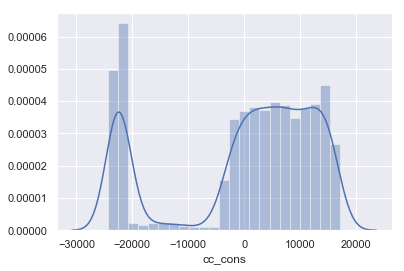

In [731]:
y_test_pred = model.predict(x_test_scale)
residuals = y_test_pred - y_test
#residuals.head()
sns.distplot(residuals)

In [732]:
def metrics(actual,pred):   
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(actual,pred)))
    print('R Squared',r2_score(actual,pred))
    print('Mean Absolute Error',mean_absolute_error(actual,pred))

In [733]:
train_pred = model.predict(x_train_scale)
test_pred =model.predict(x_test_scale)

In [734]:
metrics(y_train,train_pred)

Root Mean Squared Error 13114.725620205098
R Squared 0.002859699913509983
Mean Absolute Error 10647.173150367595


In [735]:
metrics(y_test,test_pred)

Root Mean Squared Error 13112.318561499425
R Squared -0.0025285955823506345
Mean Absolute Error 10687.232266103765


In [736]:
rmsle((np.exp(y_test)-1),(np.exp(test_pred)-1))

nan